# Visualization - Meshes


In [15]:
import sys,os

RES_PATH = '../../../../resources' 

if not os.path.exists(RES_PATH):
    print( 'cannot find \resources\, please update RES_PATH')
    exit(1)
else:
    pass


import pyglet
pyglet.options['shadow_window'] = False

import pyrender
import numpy as np
import trimesh

import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create a Mesh render object from Trimesh.Mesh

In [16]:
mesh_fp = os.path.join(RES_PATH,'torus.obj')
assert os.path.exists(mesh_fp), 'cannot found:'+mesh_fp 

tm = trimesh.load_mesh(mesh_fp) 

print('tm.type=',type(tm))

mesh_rd = pyrender.Mesh.from_trimesh(tm)

print('mesh.type=',type(mesh_rd))

tm.type= <class 'trimesh.base.Trimesh'>
mesh.type= <class 'pyrender.mesh.Mesh'>


## Add the mesh to scene and display

In [17]:
def scene_factory(render_list, return_nodes=False):
    
    scene = pyrender.Scene(ambient_light=0.5*np.array([1.0, 1.0, 1.0, 1.0]))
    
    nd_list=[]
    for m in render_list:
        nd=scene.add(m)
        nd_list.append(nd)
    
    if return_nodes:
        return scene, nd_list
    else:
        return scene

In [18]:
def show_mesh_gui(rdobj):
    scene = scene_factory([rdobj])
    v=pyrender.Viewer(scene, use_raymond_lighting=True)
    del v
    
show_mesh_gui(mesh_rd)


AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

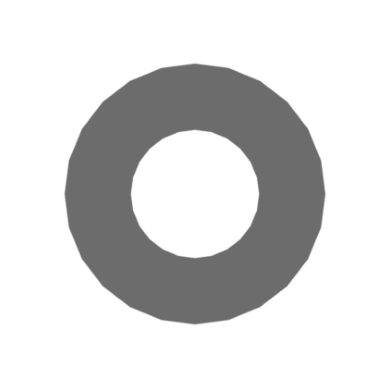

In [19]:
def show_offline_render(mesh_rd):   
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0) 
    camera_pose = np.eye(4)
    camera_pose[2,2]=-1
    camera_pose[:3,3] = np.array((0.0, 0.0,-10))
    
    scene = scene_factory([mesh_rd])
    scene.add(camera, pose=camera_pose)
    
    r = pyrender.OffscreenRenderer(viewport_width=400, viewport_height=400)
    color, depth = r.render(scene)
    r.delete()

    plt.figure(dpi=100)
    plt.imshow(color) 
    plt.axis('off')

show_offline_render(mesh_rd)

## Change mesh's vertice colors

In [20]:
mesh_fp = os.path.join(RES_PATH,'torus.obj')
assert os.path.exists(mesh_fp), 'cannot found:'+mesh_fp 
tm = trimesh.load_mesh(mesh_fp) 

# set flat color
#tm.visual.vertex_colors=(0.0,0.5,0.5)

# set random color
num = tm.vertices.shape[0]
tm.visual.vertex_colors=np.random.rand(num,3)

# convert to pyredner object
mesh_rd = pyrender.Mesh.from_trimesh(tm)

In [21]:

show_mesh_gui(mesh_rd)


AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.

## Display
![](../imgs/mesh_viewer.JPG)

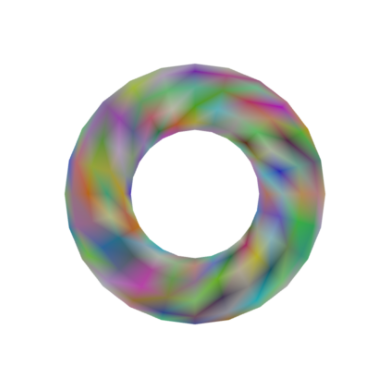

In [22]:
def run_offline(rdobj):   
    camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0) 
    camera_pose = np.eye(4)
    camera_pose[2,2]=-1
    camera_pose[:3,3] = np.array((0.0, 0.0,-10))
    
    scene = scene_factory(rdobj)
    scene.add(camera, pose=camera_pose)
    
    r = pyrender.OffscreenRenderer(viewport_width=400, viewport_height=400)
    color, depth = r.render(scene)
    r.delete()

    plt.figure(dpi=100)
    plt.imshow(color) 
    plt.axis('off')

show_offline_render(mesh_rd)